# Modelo de regresion lineal simple

In [2]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2022-09-15 02:33:21--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2022-09-15 02:33:22 (4.06 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm

In [4]:
insurance = pd.read_csv('/content/insurance.csv')

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


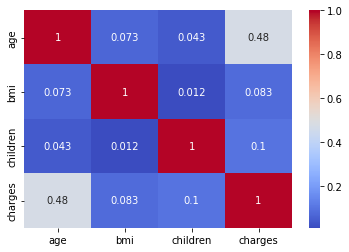

In [7]:
sns.heatmap(insurance.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True);

In [8]:
X = insurance['age'].to_numpy()
y = insurance['bmi'].to_numpy()

In [9]:
from scipy.stats import shapiro
normalidad_X = shapiro(X)
normalidad_y = shapiro(y)

print(f"Normalidad de X: {normalidad_X}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X: ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
Normalidad de y: ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)


El p-value es menor a 0.05, por lo que se rechaza la hipótesis nula (H0), la cual dice que se distribuyen de forma normal.

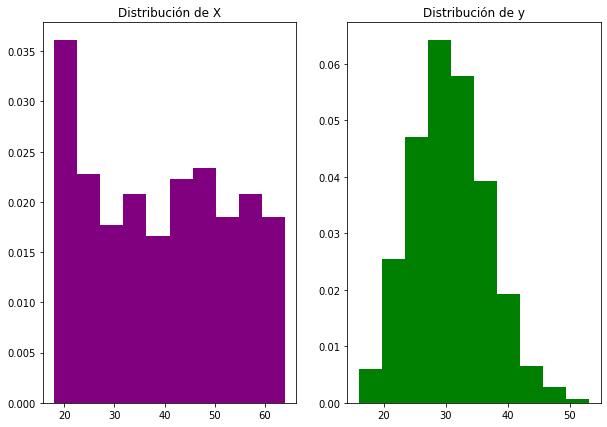

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(X,color='purple',density=True)
plt.title("Distribución de X")
plt.subplot(1,2,2)
plt.hist(y,color='green',density=True)
plt.title("Distribución de y");

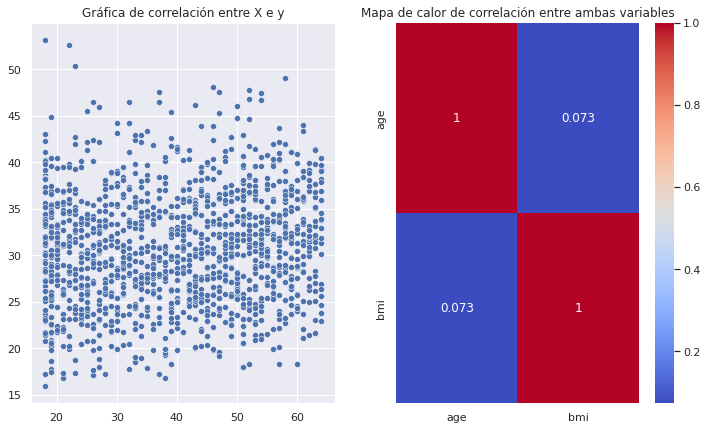

In [11]:
sns.set()

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=y)
plt.title("Gráfica de correlación entre X e y")
plt.subplot(1,2,2)
sns.heatmap(insurance[["age","bmi"]].corr(method='kendall'), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

In [12]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
#Vemos las especificaciones de cada conjunto de datos formados 
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003,) | ytrain shape (1003,)
Xtest shape: (335,) | ytest shape (335,)


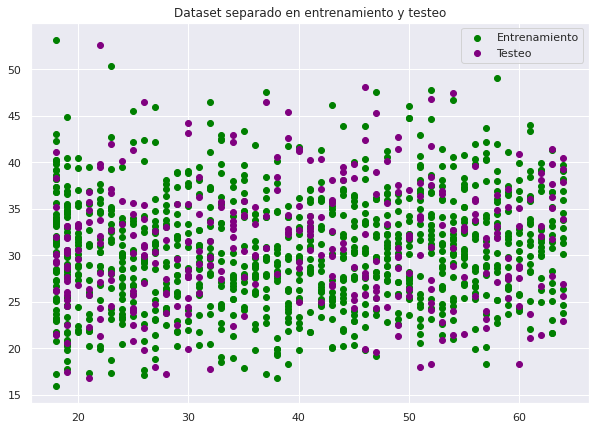

In [14]:
# Grafico de como queda el dataset separado en entrenamiento y testeo 
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='green',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='purple',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo");

In [15]:
from sklearn.linear_model import LinearRegression
#Para entrenar la regresion usamos el parámetro normalize=True, para que normalice [0,1] los datos de X y así mejorar el cálculo interno del OLS
linear_model = LinearRegression(normalize=True)
#Entrenamos el modelo con la función .fit()
linear_model.fit(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [16]:
#Vemos el coefficiente e intercepto que "aprendió" el modelo que mejor se ajustan a la relación lineal
print(f"Coeficiente que acompaña a la variable de entrada: {linear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {linear_model.intercept_}")

Coeficiente que acompaña a la variable de entrada: [[0.04768185]]
Intercepto que corta al eje de ordenadas: [28.64001759]


In [17]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {linear_model.score(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))}")
print(f"Valor de métrica R2 con el conjunto de testeo: {linear_model.score(Xtest.reshape(-1, 1),ytest.reshape(-1, 1))}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.012393305915668451
Valor de métrica R2 con el conjunto de testeo: 0.001557360482753234


In [18]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
#La función squeeze() es para quitar dimensiones extras, ej: (12,1) -> (12,) ya que las dimensiones extras solo sirven para entrenar
y_test_pred = linear_model.predict(Xtest.reshape(-1, 1)).squeeze() 
y_train_pred = linear_model.predict(Xtrain.reshape(-1, 1)).squeeze() 
y_test_pred.shape, y_train_pred.shape

((335,), (1003,))

In [19]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.043528201929191
Valor de métrica MAE con el conjunto de entrenamiento: 4.795776790873554

Valor de métrica MSE con el conjunto de testeo: 39.932773379922494
Valor de métrica MSE con el conjunto de entrenamiento: 35.67373816117116


In [20]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 53.13 | Price minimo: 15.96 | Price promedio: 30.66339686098655 | Varianza de los datos de entrada X: 197.2538519888909


In [21]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

25.175 vs 30.79 --> diferencia = -5.61 --> error: -19.86%
30.02 vs 30.36 --> diferencia = -0.34 --> error: 0.00%
26.885 vs 31.69 --> diferencia = -4.81 --> error: -14.88%
25.745 vs 30.83 --> diferencia = -5.09 --> error: -19.42%
31.92 vs 29.55 --> diferencia = 2.37 --> error: 6.27%
42.9 vs 30.26 --> diferencia = 12.64 --> error: 27.97%
22.515 vs 29.55 --> diferencia = -7.03 --> error: -31.09%
37.905 vs 31.69 --> diferencia = 6.21 --> error: 15.83%
17.29 vs 29.98 --> diferencia = -12.69 --> error: -69.40%
28.69 vs 30.98 --> diferencia = -2.29 --> error: -6.97%
24.4 vs 30.07 --> diferencia = -5.67 --> error: -20.49%
30.59 vs 30.59 --> diferencia = -0.00 --> error: 0.00%
29.59 vs 30.02 --> diferencia = -0.43 --> error: 0.00%
42.35 vs 30.83 --> diferencia = 11.52 --> error: 25.97%
40.92 vs 31.50 --> diferencia = 9.42 --> error: 21.99%
38.94 vs 30.88 --> diferencia = 8.06 --> error: 20.54%
42.68 vs 30.98 --> diferencia = 11.70 --> error: 25.77%
36.63 vs 30.88 --> diferencia = 5.75 --> error

In [22]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 15.40%


# Modelo de support vector regressor

In [24]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
insurance = pd.read_csv('/content/insurance.csv.1')

--2022-09-15 02:40:41--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2022-09-15 02:40:41 (4.06 MB/s) - ‘insurance.csv.2’ saved [54288/54288]



In [26]:
from scipy.stats import shapiro
for i in insurance.drop(columns=['sex', 'smoker', 'region']):
  print(i, '->', shapiro(insurance[i]))

age -> ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
bmi -> ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
children -> ShapiroResult(statistic=0.8231803774833679, pvalue=5.066361280494088e-36)
charges -> ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


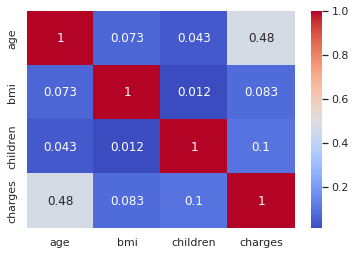

In [27]:
sns.heatmap(insurance.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True); # Metodo de kendall

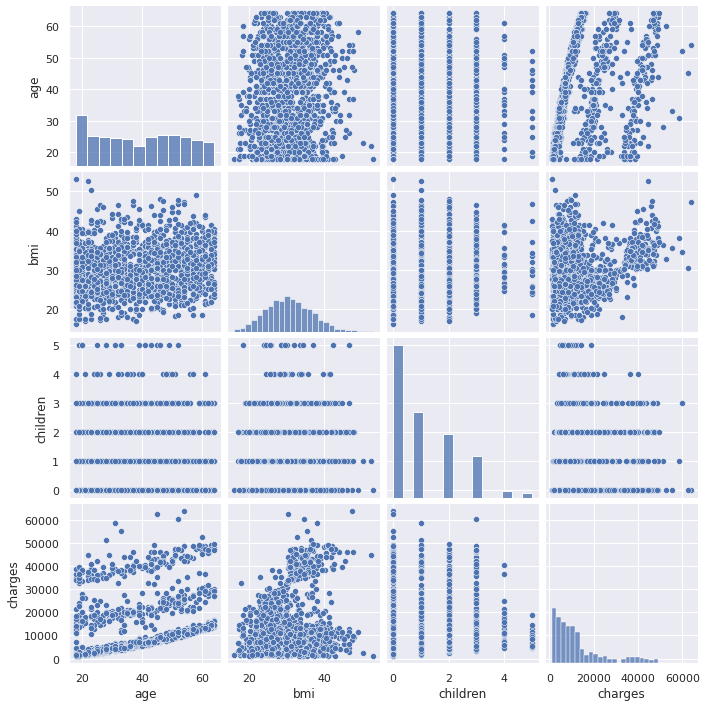

In [28]:
sns.pairplot(insurance.drop(columns=['sex', 'smoker', 'region']));

In [31]:
# Usamos el import de statsmodels.api, tambien se puede hacer con sklearn.linear_model -> LinearRegression
X = insurance[['charges', 'children', 'bmi']].to_numpy()
y = insurance['age'].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
# Importamos el modelo de support vector regressor (que usa SVM) para hacer regressiones
from sklearn.svm import SVR
svr = SVR(C=6.5,epsilon=0.5,degree=1)
svr.fit(Xtrain,ytrain)

SVR(C=6.5, degree=1, epsilon=0.5)

In [33]:
# Vemos los mejores parámetros de SVM
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
# Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.4903809577893522
Valor de métrica R2 con el conjunto de testeo: 0.5032498199643038


In [40]:
# Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain) 
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [37]:
# Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) # Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) # Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) # Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) # Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.655089265174242
Valor de métrica MAE con el conjunto de entrenamiento: 5.955793480643334

Valor de métrica MSE con el conjunto de testeo: 98.4984187414841
Valor de métrica MSE con el conjunto de entrenamiento: 100.34396909761773


In [38]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] # Creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

45 vs 48.78 --> diferencia = -3.78 --> error: -6.67%
36 vs 34.32 --> diferencia = 1.68 --> error: 2.78%
64 vs 29.35 --> diferencia = 34.65 --> error: 53.12%
46 vs 49.40 --> diferencia = -3.40 --> error: -6.52%
19 vs 28.74 --> diferencia = -9.74 --> error: -47.37%
34 vs 31.16 --> diferencia = 2.84 --> error: 5.88%
19 vs 21.02 --> diferencia = -2.02 --> error: -10.53%
64 vs 56.51 --> diferencia = 7.49 --> error: 10.94%
28 vs 27.71 --> diferencia = 0.29 --> error: 0.00%
49 vs 51.95 --> diferencia = -2.95 --> error: -4.08%
30 vs 51.97 --> diferencia = -21.97 --> error: -70.00%
41 vs 42.43 --> diferencia = -1.43 --> error: -2.44%
29 vs 28.63 --> diferencia = 0.37 --> error: 0.00%
46 vs 53.77 --> diferencia = -7.77 --> error: -15.22%
60 vs 57.82 --> diferencia = 2.18 --> error: 3.33%
47 vs 49.47 --> diferencia = -2.47 --> error: -4.26%
49 vs 50.79 --> diferencia = -1.79 --> error: -2.04%
47 vs 46.43 --> diferencia = 0.57 --> error: 0.00%
46 vs 45.98 --> diferencia = 0.02 --> error: 0.00%
43 

In [41]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 16.75%
